<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


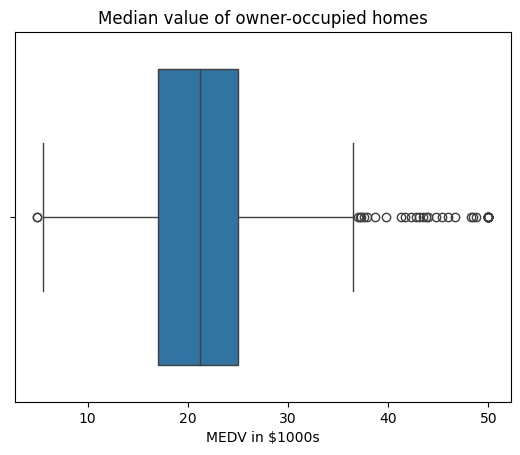

In [13]:
ax = sns.boxplot(x='MEDV', data=boston_df) #graoh for boxplot with the Bosotn Data
plt.title("Median value of owner-occupied homes") # title for the boxplot
plt.xlabel('MEDV in $1000s')
plt.show() # Display the results that was given from the Boston Data

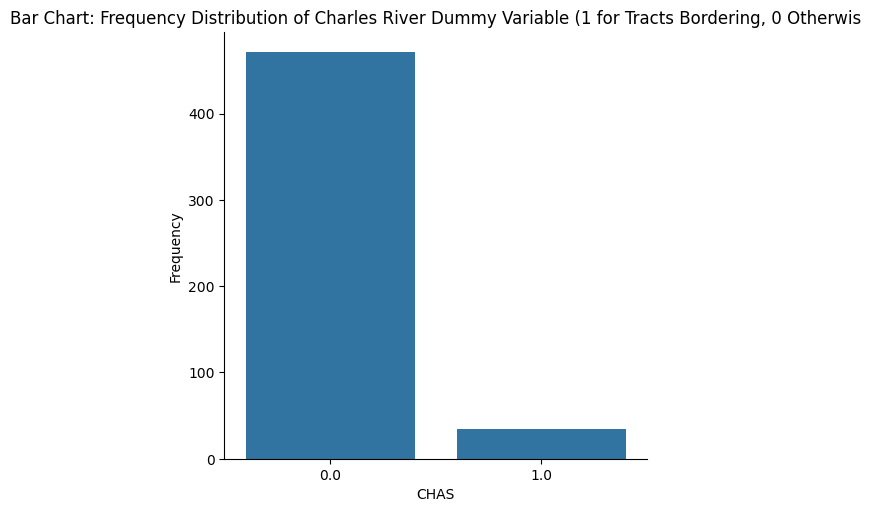

In [18]:
x1 = sns.catplot(x='CHAS', kind='count', data=boston_df) # Setup a bar chart from the Boston Data
plt.title('Bar Chart: Frequency Distribution of Charles River Dummy Variable (1 for Tracts Bordering, 0 Otherwis') # Give a title to the chart
plt.xlabel('CHAS') # Set the x-label to Charles Rivr Dummy Variable
plt.ylabel('Frequency') # Set the frequency in the y-label
plt.show() #Display the catplot chart

In [19]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger' # Setup the different age groups with the Boston Data
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

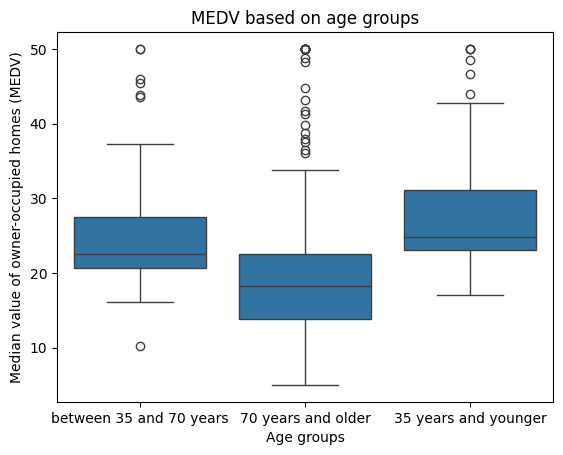

In [23]:
ax = sns.boxplot(x='age_group', y= 'MEDV', data=boston_df) # Create a box plot for the age group and the median value of owner-occupied homes in the $1000s
plt.title('MEDV based on age groups') # Give a title to the chart
plt.xlabel('Age groups')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.show() # Display the boxplot with the age groups and the median value

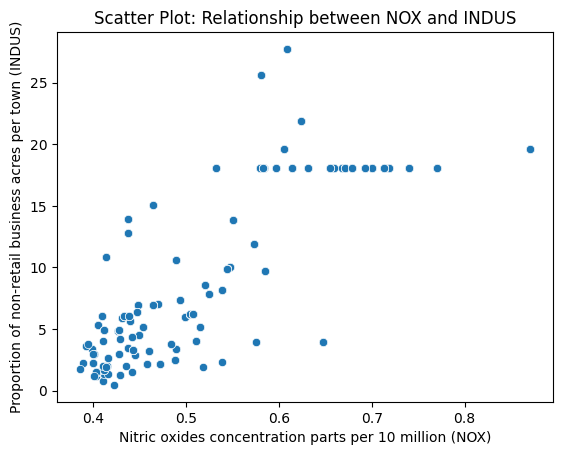

In [24]:

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df) # Setup a scatter plot for the Boston Data with non-retail and nitric oxides concentration
plt.title('Scatter Plot: Relationship between NOX and INDUS') # Setup a title for the scatter plot
plt.xlabel('Nitric oxides concentration parts per 10 million (NOX)') 
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.show() # Display the scatter plot with x and y labels.

In [25]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS']) # Calculate a Pearson correlation coefficient and the p-value for testing non-correlation

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

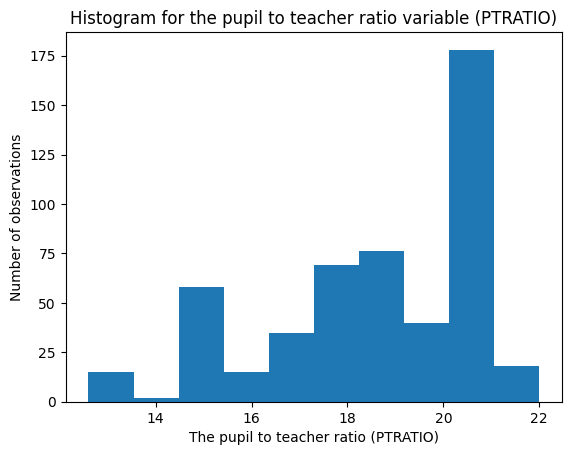

In [26]:
plt.hist(boston_df['PTRATIO']) # Create a histogram for pupil-teacher ration by town
plt.xlabel('The pupil to teacher ratio (PTRATIO)') # Create a title
plt.ylabel('Number of observations')
plt.title("Histogram for the pupil to teacher ratio variable (PTRATIO)")
plt.show() # Display the histogram for the x and y labels

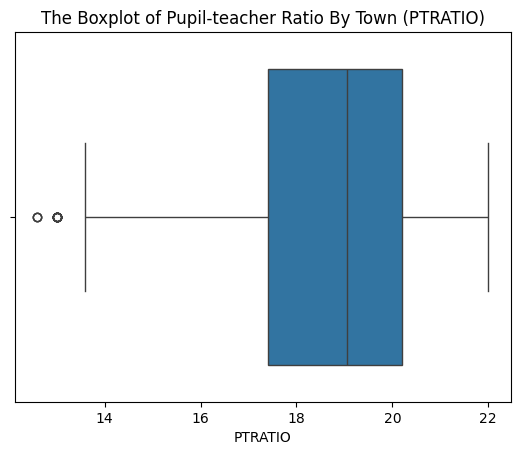

In [27]:
ax = sns.boxplot(x='PTRATIO', data=boston_df)
plt.title('The Boxplot of Pupil-teacher Ratio By Town (PTRATIO)')
plt.xlabel('PTRATIO')
plt.show()

In [28]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
# Do a levene test against the Charles River Dummy variable and the median value of owner-occupied homes in the $1000s to find the mean

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [29]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median') # since the data is skewed, we use median as center and it is greater than alpha value 0.05,
# Do a levene test against the Charles River Dummy variable and the median value of owner-occupied homes in the $1000s to find the median

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [30]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=True) # since p-value is less than alpha value 0.05, we reject the null hypothesis,


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)